<br>
<h1 style="font-family:sans-serif; text-align:center"> 
<!--     <span style='color: pink'> Twitter analysis of </span> -->
    <span style='color: white; font-size:50%; text-shadow: 0px 0px 15px black'> Twitter analysis of </span>
<!--     <span style='color:#00acee'> Twitter analysis of </span> -->
<!--     <span style="-webkit-text-stroke"> Twitter analysis of</span> -->
<!--     <span class="hr3" style='color:#e40843; letter-spacing: 4px; font-size:105%'> Canada</span> -->
    <span class="hr3" style='color:#e40843; font-size:60%; text-shadow: 0px 0px 30px pink'>Canada </span> <span class="hr3" style='color:gray; font-size:50%; text-shadow: 0px 0px 30px pink'>response to Covid-19</span><br>
</h1>

# EDA

The aim of this notebook is to perform an Exploratory Data Analysis (EDA) to the retrieved tweets obtained using *snscrape*, from March 1st to April 30th of 2020, from Government of Canada official Twitter accounts.

_Authors: Leo Cuspinera ([cuspime](https://github.com/cuspime)) and Victor Cuspinera ([vcuspinera](https://github.com/vcuspinera))_

## Import libraries

In [1]:
# General libraries
import pandas as pd
import numpy as np
import os
import time
from datetime import datetime, timedelta, date
from pytz import timezone
import json

# To plot
import altair as alt
alt.renderers.enable('mimetype')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Open `json` file with all tweets

In [2]:
%%time
START = time.time()

# Parameters
my_folder = "../tweets/"

# Open the file
df_tot = pd.read_json(my_folder + 'tweets_db_clean.json')

CPU times: user 8.35 s, sys: 1.1 s, total: 9.45 s
Wall time: 9.54 s


## Basic analysis

In [3]:
# A first view of the data frame
df_tot.tail(3)

,account,date,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,username,followersCount,friendsCount,location,tweet
709107,@JustinTrudeau,2020-04-30 00:00:19,1,0,0,0,en,Twitter for iPhone,pffoote,364,1538,"St. John's, NL, Canada",@rcaf_arc @cfsnowbirds @canadianforces @cfoper...
709108,@JustinTrudeau,2020-04-30 00:00:18,0,0,0,0,hi,Twitter for Android,chandan24513630,1,41,,@narendramodi @justintrudeau who बौना होगा अगर...
709109,@JustinTrudeau,2020-04-30 00:00:08,0,0,0,0,en,Twitter Web App,DavidCBarron,230,332,Brampton Ontario,@cbcnews @ctvnews @justintrudeau @celliottabil...


In [4]:
# number of tweets
len(df_tot)

709110

In [5]:
# Check if it contains the rigth tweets
%time df_tot.groupby(['account']).count()

CPU times: user 331 ms, sys: 17.3 ms, total: 348 ms
Wall time: 350 ms


,date,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,username,followersCount,friendsCount,location,tweet
account,,,,,,,,,,,,
@Canada,13691,13691,13691,13691,13691,13691,13691,13691,13691,13691,13691,13691
@CanadianPM,34660,34660,34660,34660,34660,34660,34660,34660,34660,34660,34660,34660
@GovCanHealth,24226,24226,24226,24226,24226,24226,24226,24226,24226,24226,24226,24226
@JustinTrudeau,636533,636533,636533,636533,636533,636533,636533,636533,636533,636533,636533,636533


In [6]:
df_tot.describe()

,replyCount,retweetCount,likeCount,quoteCount,followersCount,friendsCount
count,709110.000000,709110.000000,709110.000000,709110.000000,7.091100e+05,7.091100e+05
mean,0.702268,1.476785,6.323947,0.194267,1.026041e+04,1.177396e+03
std,14.478383,69.567134,275.375628,18.646346,2.498230e+05,4.296168e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,5.900000e+01,1.490000e+02
50%,0.000000,0.000000,0.000000,0.000000,2.710000e+02,4.660000e+02
75%,0.000000,0.000000,1.000000,0.000000,1.073000e+03,1.284000e+03
max,3818.000000,23907.000000,86799.000000,13797.000000,8.408725e+07,1.438121e+06


In [7]:
# See the number of unique terms per each variable
df_tot.nunique()

account                4
date              622677
replyCount           398
retweetCount         639
likeCount           1228
quoteCount           216
lang                  57
sourceLabel          211
username          185926
followersCount     13818
friendsCount        8606
location           38537
tweet             647222
dtype: int64

In [8]:
# tweets by `Account`
print("Number of tweets by Account:\n")
pd.DataFrame(df_tot['account'].value_counts())

Number of tweets by Account:



,account
@JustinTrudeau,636533
@CanadianPM,34660
@GovCanHealth,24226
@Canada,13691


In [9]:
# tweets by `language`
languages_twitter = pd.read_csv(my_folder + "twitter_supported_languages.csv", skiprows=5)
languages_twitter

print("Number of tweets by Languages:")
print("  -- the most used ones --\n")
data_langs = pd.DataFrame(df_tot['lang'].value_counts().head()).\
            reset_index().rename(columns={'index':'Language_code', 'lang':'tweets'})

# languages_twitter
pd.merge(languages_twitter, data_langs, how="right", on=["Language_code", "Language_code"])


Number of tweets by Languages:
  -- the most used ones --



,Language_code,Name,tweets
0,en,English (default),606516
1,und,NaN,56295
2,fr,French,25295
3,es,Spanish,9492
4,hi,Hindi,1916


## EDA plots

In [10]:
%%time

# add column with day
df_tot['day'] = [df_tot['date'][i].strftime("%Y-%m-%d") for i in range(len(df_tot))]

CPU times: user 12.4 s, sys: 40.5 ms, total: 12.5 s
Wall time: 12.5 s


### Tweets per day by account

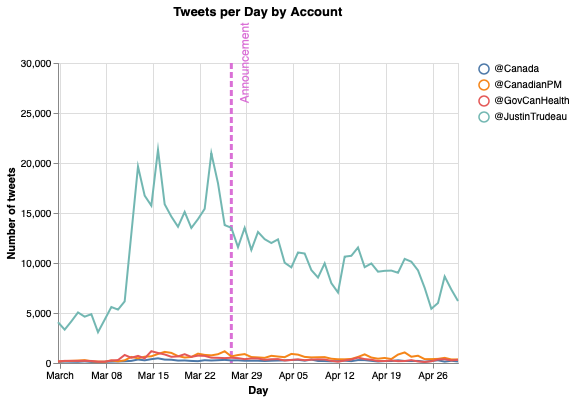

In [11]:
df_aux = pd.DataFrame(df_tot.groupby(['account', 'day'])['tweet'].count()).reset_index()

base = alt.Chart(df_aux)

lines = base.mark_line().encode(
    x = alt.X('day:T', title="Day"),
    y = alt.Y('tweet:Q', title="Number of tweets"),
    color = alt.Color('account'),
    tooltip = ['account', 'tweet']
).properties(
    title='Tweets per Day by Account'
)

rule = alt.Chart(pd.DataFrame({
    'day': ['2020-03-27'],
    'color': ['orchid']
})).mark_rule(size=3, strokeDash=[6,3]).encode(
  x='day:T',
  color=alt.Color('color:N', scale=None, title = "")
)

text = alt.Chart(pd.DataFrame({
    'day': ['2020-03-29'],
    'color': ['orchid'],
    'y1': [30_000],
    'y2': [3_000]
})).mark_text(
    text='Announcement', angle=270, size=12
).encode(
    x='day:T', y='y1',
    color=alt.Color('color:N', scale=None, title = "")
)

rule + lines + text

When comparing the tweets per day by Canadian Government Twitter accounts, we can find that between March and April 2020, [@Canada](https://twitter.com/Canada) had between 29.1 and 62.4 thousand tweets per day, followed by [@JustinTrudeau](https://twitter.com/JustinTrudeau) that had between 3.5 and 29.7 thousand tweets per day. However, this plot doesn't allow us to identify the number of tweets for the [@CanadianPM](https://twitter.com/CanadianPM) and [@GovCanHealth](https://twitter.com/GovCanHealth) accounts. The best way to show the number of tweets would be using logscale in the y-axis.

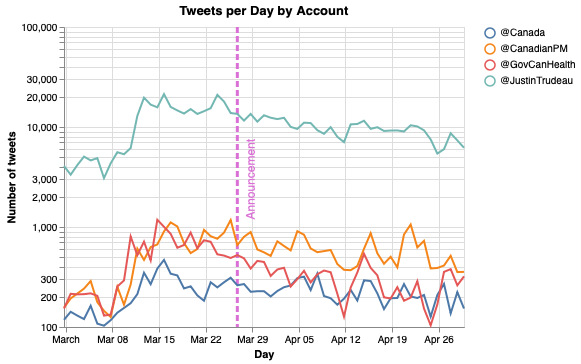

In [12]:
lines2 = lines.encode(
    y = alt.Y('tweet:Q', scale=alt.Scale(type='log'), title="Number of tweets")
)

text2 = text.encode(y='y2')

rule + lines2 + text2
# lines2

Additionally to the previous range of tweets for [@Canada](https://twitter.com/Canada) and [@JustinTrudeau](https://twitter.com/JustinTrudeau) accounts, with this plot it is easier to identify the number of tweets of the [@CanadianPM](https://twitter.com/CanadianPM) and [@GovCanHealth](https://twitter.com/GovCanHealth) accounts. While @CanadianPM one has between 131 and 1207 tweets, @GovCanHealth had between 105 and 1188 tweets.

While we were expecting to see an increase in the number of tweets after Trudeau announcement on March 27<sup>th</sup> of 2020, in the previous plots we identify that this hypothesis was wrong. However, we find something unexpected: in the four Canadian Government accounts we see and increment in number of tweets which had an important increase in number of tweets around March 12<sup>th</sup>.

### Proportion of tweets for each Account by Language

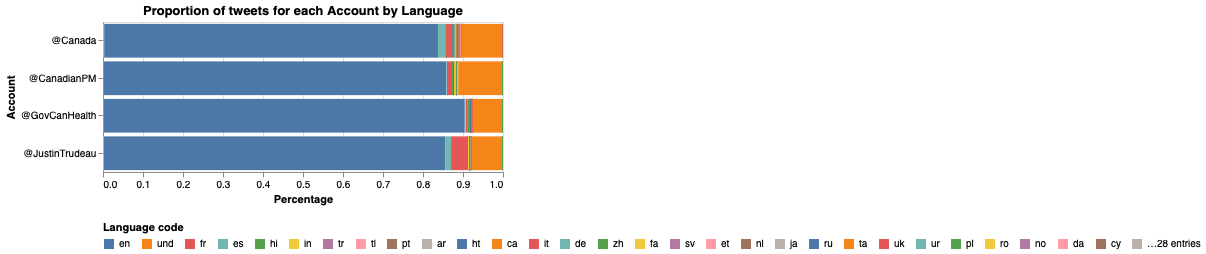

In [13]:
df_aux = pd.DataFrame(df_tot.groupby(['account', 'lang'])['tweet'].count()).reset_index()
sort_lang = pd.DataFrame(df_aux.groupby(['lang'])['tweet'].sum()).reset_index().sort_values(by=['tweet'], ascending=False).reset_index()['lang']

alt.Chart(df_aux).mark_bar().encode(
    x=alt.X('sum(tweet)', stack="normalize", title="Percentage"),
    y=alt.Y('account', title="Account"),
    color=alt.Color('lang', sort=sort_lang.to_list(), title="Language code", legend=alt.Legend(orient="bottom")),
    tooltip=['account' , 'lang']
).properties(
    title='Proportion of tweets for each Account by Language',
    height=150
)


In [34]:
# Porcentaje of 
df_aux = pd.DataFrame(df_tot.groupby(['lang'])['tweet'].count()).reset_index().sort_values(by=['tweet'], ascending=False)
df_aux['weight (%)'] = df_aux.tweet / df_aux['tweet'].sum() * 100
df_aux.head()

,lang,tweet,weight (%)
11,en,606516,85.532005
53,und,56295,7.938825
17,fr,25295,3.567148
12,es,9492,1.338579
19,hi,1916,0.270198


In [35]:
len(df_aux)

57

Here we can identify that tweets mainly in English (`en`), which represent 85.5% of all tweets. It follows a group of undefined language (`und`). The third and fourth languages in the tweets database are French (`fr`) and Spanish (`es`).

### Users with most tweets that mention/or are related with the official Canadian accounts

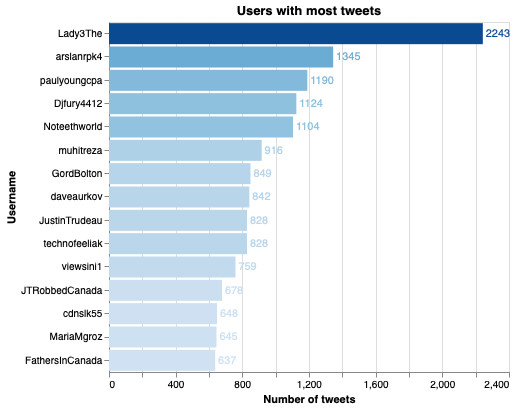

In [15]:
df_aux = pd.DataFrame(df_tot.groupby(['username'])['tweet'].count()).reset_index().sort_values(by=['tweet'], ascending=False).reset_index(drop=True)

bars = alt.Chart(df_aux[:15]).mark_bar().encode(
    x=alt.X('tweet', title="Number of tweets"),
    y=alt.Y('username', sort=list(df_aux['username'][:15]), title="Username"),
    color=alt.Color('tweet', legend=None)
).properties(
    title='Users with most tweets'
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='tweet:Q'
)

(bars + text).properties(height=350)

The users with most tweets mentioning any of the four Canadian Government Twitter accounts were __AbhiQeep__  which is an account that posts coordinates to find Pokemons, with 6,504 tweets; __canadanewsmedia__, the official account of Canada News Media, with 5,930 tweets; and __retiredknitwit__ from a retired Canadian woman, with 4,305 tweets.

### Users that tweet on official Canadian twitter accouns, with most followers

In [16]:
%%time

# Dataframe of followers per user user
df_followers = df_tot[['username', 'followersCount', 'account']].reset_index(drop=True)
df_followers = df_followers.groupby(['username']).mean().reset_index().sort_values(by=['followersCount'], ascending=False).reset_index(drop=True)
df_followers['followers_M'] = df_followers['followersCount'] / 1_000_000
df_followers.drop(['followersCount'], axis=1, inplace=True)

# Dataframe of tweets per official Canada twitter accounts
df_aux = df_tot[['username', 'account']]
df_aux['counts'] = 1
df_aux = df_aux.groupby(['username', 'account']).sum().reset_index()

# merge the previous dataframes
df_aux = pd.merge(df_aux, df_followers, on='username', how='outer').sort_values(by=['followers_M'], ascending=False).reset_index(drop=True)

CPU times: user 2.06 s, sys: 208 ms, total: 2.27 s
Wall time: 1.8 s


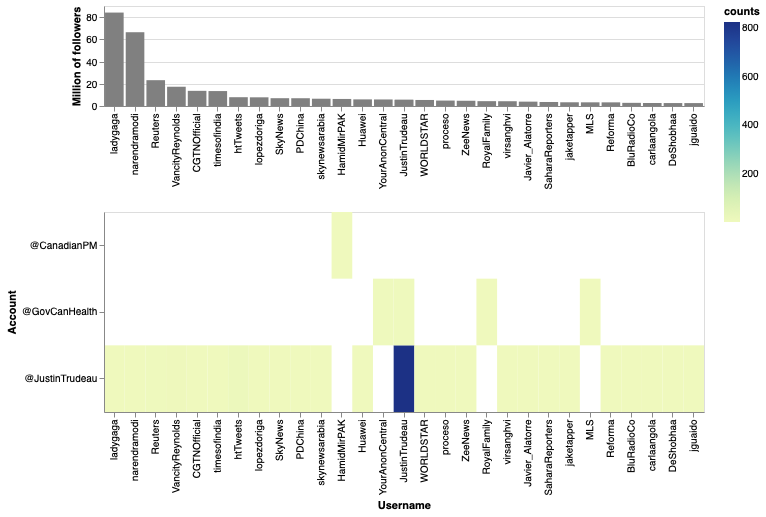

In [17]:
base = alt.Chart(df_aux.head(30)).encode(
    x=alt.X('username', sort=df_aux['username'].unique()[:1100], title='Username'),
    y=alt.Y('account', title='Account')
).properties(height=200, width=600)

top_hist = base.mark_bar(color="gray").encode(
    alt.X('username',
          sort=df_aux['username'].unique()[:1100],
          title=''
         ),
    alt.Y('followers_M', stack=None, title='Million of followers'),
    tooltip = ['username', 'followers_M']
).properties(height=100)

heat = base.mark_rect().encode(
    color='counts',
    tooltip = ['username', 'followers_M', 'counts']
)

top_hist & heat

In the previous plots we can identify the users with most followers that mention at least one Official Canadian account. Stand out users as __Lady Gaga__ the pop singer with 84.0 million followers, __Narendra Modi__ who is the current Prime Minister of India with 66.4 million followers, __Reuters__ that is a multinational media conglomerate with 23.2 million users.

### Users that tweet on official Canadian twitter accouns, with most friends

In [18]:
%%time

# Dataframe of followers per user user
df_followers = df_tot[['username', 'friendsCount', 'account']].reset_index(drop=True)
df_followers = df_followers.groupby(['username']).mean().reset_index().sort_values(by=['friendsCount'], ascending=False).reset_index(drop=True)
df_followers['friends_M'] = df_followers['friendsCount'] / 1_000_000
df_followers.drop(['friendsCount'], axis=1, inplace=True)

# Dataframe of tweets per official Canada twitter accounts
df_aux = df_tot[['username', 'account']]
df_aux['counts'] = 1
df_aux = df_aux.groupby(['username', 'account']).sum().reset_index()

# merge the previous dataframes
df_aux = pd.merge(df_aux, df_followers, on='username', how='outer').sort_values(by=['friends_M'], ascending=False).reset_index(drop=True)

CPU times: user 1.82 s, sys: 86.1 ms, total: 1.9 s
Wall time: 1.91 s


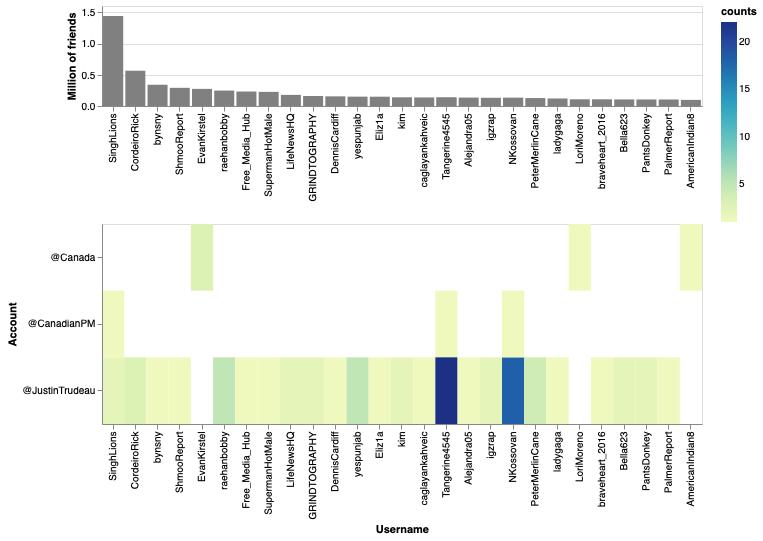

In [19]:
base = alt.Chart(df_aux.head(30)).encode(
    x=alt.X('username', sort=df_aux['username'].unique()[:1100], title='Username'),
    y=alt.Y('account', title='Account')
).properties(height=200, width=600)

top_hist = base.mark_bar(color="gray").encode(
    alt.X('username',
          sort=df_aux['username'].unique()[:1100],
          title=''
         ),
    alt.Y('friends_M', stack=None, title='Million of friends'),
    tooltip = ['username', 'friends_M']
).properties(height=100)

heat = base.mark_rect().encode(
    color='counts',
    tooltip = ['username', 'friends_M', 'counts']
)

top_hist & heat

### Check this!!!!
This analysis is similar to the analysis of the previous section. In this case the users with more friends are the __Harjinder Singh Kukreja__ who is a restaurateur and social activist from India with 1.44 million twitter friends, __Miguel H Otero__ who is the Presidente Editor of Diario El Nacional with 1.06 million friends, and __Jordan Daley__ an entrepreneur with 0.97 million friends.

### Tokens per tweet distribution

In [20]:
# count the tokens per tweets
%time tweet_size = [len(tweet) for tweet in df_tot['tweet']]

source = pd.DataFrame(tweet_size).reset_index().rename(columns = {0:"tokens", 'index': "counts"})
source = source.groupby(['tokens']).count().reset_index()

CPU times: user 130 ms, sys: 7.27 ms, total: 138 ms
Wall time: 137 ms


In [21]:
base = alt.Chart(source).mark_line().encode(
    x=alt.X("tokens:Q"),
    y=alt.Y('counts', title="Count of records")
).properties(
    title='Histogram of number of tokens by tweet'
)

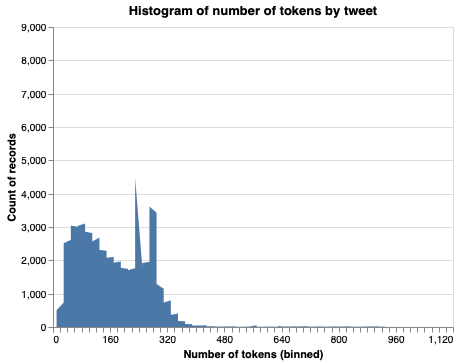

In [22]:
histo = base.mark_area().encode(x=alt.X("tokens:Q", bin=alt.Bin(maxbins=70), title="Number of tokens (binned)"))
#line = base.transform_regression('tokens', 'counts', method="poly", order=1).mark_line(size=4, color="salmon")
histo

### Analysis by location

In [23]:
pd.DataFrame(df_tot.groupby(['location'])['tweet'].count()).reset_index().sort_values(by=['tweet'], ascending=False).reset_index(drop=True)

,location,tweet
0,,236051
1,Canada,50668
2,"Ontario, Canada",21355
3,"Toronto, Ontario",20096
4,Toronto,10562
...,...,...
38532,"Patna, India🇮🇳",1
38533,75013,1
38534,"Patna, Bihar",1
38535,Patna ✈ Bangalore ✈ Delhi,1


The location of the tweets depends on description manually given by the user. It looks ambiguous and probably is not very useful for this analysis.

### Heatmaps with number of tweets

In [24]:
# wrangling data and get total
source = df_tot.groupby(['account', 'day'])['tweet'].count().reset_index() #count()
aux_tot = df_tot.groupby(['account'])['tweet'].count().reset_index().rename(columns = {'tweet': 'total'})
df_aux = pd.merge(source, aux_tot, on='account', how='left')

# get weight
df_aux['weight'] = df_aux['tweet']/df_aux['total']

In [25]:
# moving average
df_aux2 = pd.DataFrame()
for i in df_aux.account.unique():
    xxx = df_aux[df_aux.account == i][['tweet']].rolling(3, min_periods=1, center=True).mean()
    xxx['account'] = i
    df_aux2 = pd.concat([df_aux2, xxx])
df_aux2.rename(columns = {'tweet': 'mov_avg'}, inplace=True)

# get min and max of moving average
# aux_tot = pd.DataFrame()
aux = dict(dict())
for i in df_aux2.account.unique():
    aux[i] = {
        'min' : np.min(df_aux2[df_aux2.account == i]['mov_avg']),
        'max' : np.max(df_aux2[df_aux2.account == i]['mov_avg'])
    }
aux = pd.DataFrame(aux).transpose().reset_index().rename(columns={'index':'account'})
df_aux2 = pd.merge(df_aux2, aux, on='account', how='left')

# # weight the moving average
df_aux3 = pd.concat([df_aux, df_aux2[['mov_avg', 'min', 'max']]], axis=1)
df_aux3['weight_MA'] = df_aux3['mov_avg']/df_aux3['total']

# normalization
# df_aux3['normalize'] = (df_aux3['tweet']-df_aux3['min']) / (df_aux3['max'] - df_aux3['min'])
df_aux3['normal_MA'] = (df_aux3['mov_avg']-df_aux3['min']) / (df_aux3['max'] - df_aux3['min'])

df_aux3.head()

,account,day,tweet,total,weight,mov_avg,min,max,weight_MA,normal_MA
0,@Canada,2020-03-01,118,13691,0.008619,130.000000,109.333333,398.0,0.009495,0.071594
1,@Canada,2020-03-02,142,13691,0.010372,130.000000,109.333333,398.0,0.009495,0.071594
2,@Canada,2020-03-03,130,13691,0.009495,130.666667,109.333333,398.0,0.009544,0.073903
3,@Canada,2020-03-04,120,13691,0.008765,137.666667,109.333333,398.0,0.010055,0.098152
4,@Canada,2020-03-05,163,13691,0.011906,130.333333,109.333333,398.0,0.009520,0.072748


#### Heatmap with number of tweets per day by account

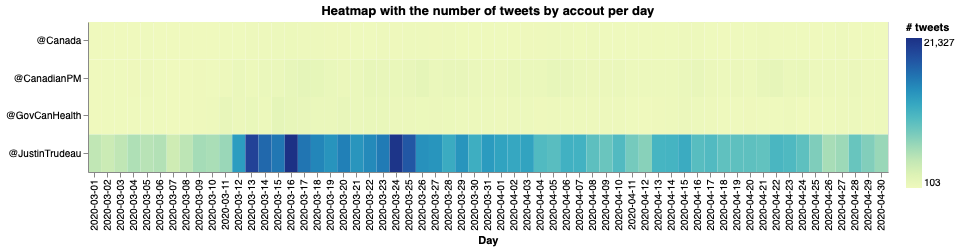

In [53]:
# heatmap with the number of tweets by account, per day
base = alt.Chart(df_aux3).mark_rect().encode(
    x=alt.X('day:O', title="Day"),
    y=alt.Y('account:O', title=""),
    color=alt.Color('tweet:Q', title="# tweets")
).properties(height=150, width=800)

base.properties(title='Heatmap with the number of tweets by accout per day')

With this heatmap we can identify the accounts with most tweets, but it is not as useful for identidying the days with more tweets for the accounts [@CanadianPM](https://twitter.com/CanadianPM) and [@GovCanHealth](https://twitter.com/GovCanHealth).

#### Heatmap with weights of number of tweets per day by account

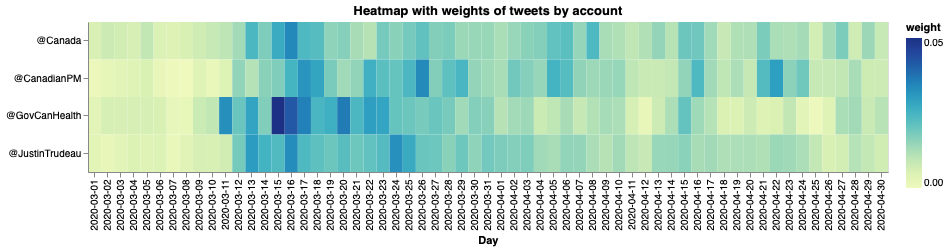

In [54]:
# use a heatmap to show the weights of number of tweets by account, per day
base.encode(color='weight').properties(title='Heatmap with weights of tweets by account')

In the previous heatmap we normalize the number of tweets by each Twitter account. With this plot, we can identify a higher number of tweets for all twitter accounts between March 12 and March 29, 2020.  

#### Heatmap with weights of Moving Averages of tweets per day by account

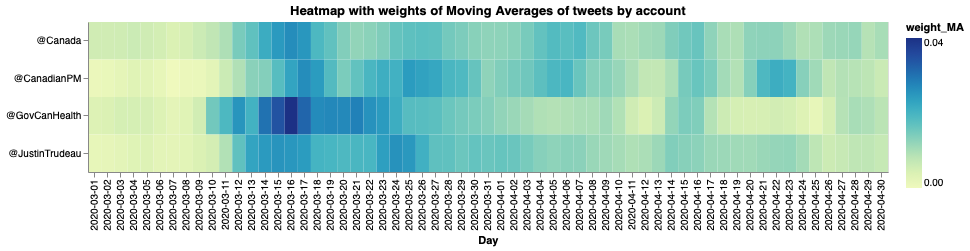

In [55]:
# use a heatmap to show the weights of moving averages of tweets by account, per day
base.encode(color='weight_MA').properties(title='Heatmap with weights of Moving Averages of tweets by account')

The previous plot shows the heatmap of weights using Moving Averages of number of tweets per day by each Government of Canada's Twitter account. We look for different moving averages (3, 5 and 7 days) and finally we decide to use a 7-day window which removes weekly seasonality. In this plot while @Canada tweets are homogeneous along the complete period of 61 days, in the case of the other three accounts (@CanadianPM, @GovCanHealth, and @JustinTrudeau) the proportion of tweets was lower before March 10th of 2020 and increase from this point until the first days of April 2020, where start decreasing the average of tweets.

#### Heatmap with Normalized Moving Averages of tweets per day by account

Finally, we also made a heatmap of the normalized Moving Averages, were we can detect the days with more tweets and less tweets, removing weekly seasonality.

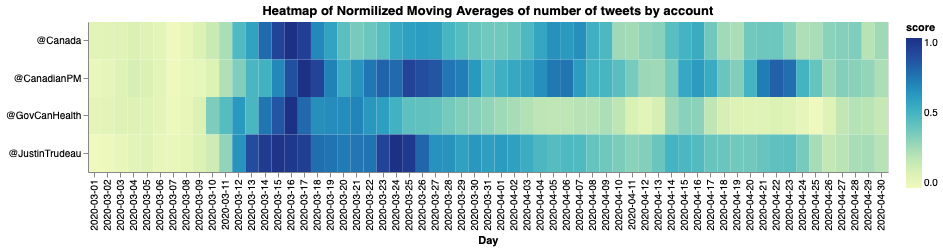

In [56]:
# use a heatmap to show the weights of moving averages of number or tweets by account, per day
base.encode(alt.Color(
    'normal_MA', title="score"),
    tooltip=['account', 'day', 'normal_MA']
).properties(title='Heatmap of Normilized Moving Averages of number of tweets by account')

In this plot we can identify an increase in number of tweets for all the Canadian Government's Twitter accounts around March 10th, 2020, with a peak of tweets between March 14th and 17th, decreasing from this point on until return to lower levels in mid-late April 2020.

### Reply, retweet, like, quote, followers and friends count by account

In [30]:
# Count information
pd.DataFrame(df_tot.groupby(['account']).sum()).reset_index()

,account,replyCount,retweetCount,likeCount,quoteCount,followersCount,friendsCount
0,@Canada,5372,9385,39703,1031,74167078,18547724
1,@CanadianPM,22502,53477,158213,6926,190349858,37198578
2,@GovCanHealth,15528,67512,121159,5328,366647257,28891382
3,@JustinTrudeau,454583,916829,4165299,124472,6644595412,750265272


In [31]:
# Count information per day
df_aux = pd.DataFrame(df_tot.groupby(['account', 'day']).sum()).reset_index()
df_aux

,account,day,replyCount,retweetCount,likeCount,quoteCount,followersCount,friendsCount
0,@Canada,2020-03-01,55,235,929,22,2012244,162629
1,@Canada,2020-03-02,49,172,996,18,2936735,257067
2,@Canada,2020-03-03,67,388,1498,36,2268901,299809
3,@Canada,2020-03-04,30,146,754,14,2541955,183044
4,@Canada,2020-03-05,98,233,1145,17,2917082,592137
...,...,...,...,...,...,...,...,...
239,@JustinTrudeau,2020-04-26,3284,7941,27457,660,64329476,6319588
240,@JustinTrudeau,2020-04-27,4191,7091,26773,885,73163506,7597299
241,@JustinTrudeau,2020-04-28,8508,16858,146089,1220,227084003,8886029
242,@JustinTrudeau,2020-04-29,4641,5369,25502,738,87585681,7062350


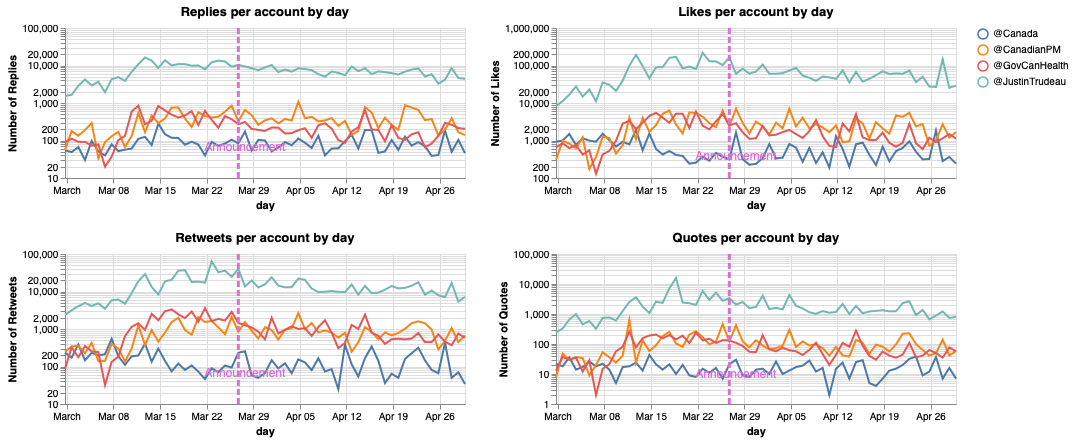

In [32]:
# Replies per account by day
base = alt.Chart(df_aux).mark_line().encode(
    x = 'day:T',
    color = 'account'
).properties(width=400, height=150)

replies = base.encode(
    y = alt.Y('replyCount', scale=alt.Scale(type='log'), title="Number of Replies"),
).properties(title='Replies per account by day')


# Retweets per account by day
retweets = base.encode(
    y = alt.Y('retweetCount', scale=alt.Scale(type='log'), title="Number of Retweets"),
).properties(title='Retweets per account by day')


# Likes per account by day
likes = base.encode(
    y = alt.Y('likeCount', scale=alt.Scale(type='log'), title="Number of Likes"),
).properties(title='Likes per account by day')


# Quotes per account by day
quotes = base.encode(
    y = alt.Y('quoteCount', scale=alt.Scale(type='log'), title="Number of Quotes"),
).properties(title='Quotes per account by day')


# announcement date
rule = alt.Chart(pd.DataFrame({
    'day': ['2020-03-27'],
    'color': ['orchid']
})).mark_rule(size=3, strokeDash=[6,3]).encode(
  x='day:T',
  color=alt.Color('color:N', scale=None, title = "")
)

text = alt.Chart(pd.DataFrame({
    'day': ['2020-03-28'],
    'color': ['orchid'],
    'y1': [70],
    'y2': [400],
    'y3': [10]
})).mark_text(
    text='Announcement', angle=0, size=12
).encode(
    x='day:T', y='y1',
    color=alt.Color('color:N', scale=None, title = "")
)

p1 = replies + rule + text
p2 = retweets + rule + text
p3 = likes + rule + text.encode(y='y2')
p4 = quotes + rule + text.encode(y='y3')

(p1 & p2) | (p3 & p4)

The four previous plots about replies, retweets, likes and quotes coincide with the previous information and plots about tweets per day by Account.

In [33]:
print("Total time:", np.round((time.time() - START)/60, 2), "minutes.")

Total time: 0.52 minutes.
